# **Banking Dataset - Marketing Targets**

**Banking Dataset of different customers to predict if they will convert or not.**

*dataset link: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets*

The dataset pertains to the direct marketing campaigns of a Portuguese banking institution, where the campaigns were conducted through phone calls. Often, multiple contacts with the same client were necessary to determine whether the client would subscribe (yes) or not (no) to a bank term deposit. The data folder includes two datasets:

* train.csv: Contains 45,211 rows and 18 columns, ordered by date from May 2008 to November 2010.
* test.csv: Contains 4,521 rows and 18 columns, representing 10% of the examples, randomly selected from train.csv.


#Detailed Column Descriptions:

**Bank Client Data:**

1. age: Age of the client (numeric).
2. job: Type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services").
3. marital: Marital status (categorical: "married", "divorced", "single"; note: "divorced" includes divorced and widowed).
4. education: Level of education (categorical: "unknown", "secondary", "primary", "tertiary").
5. default: Does the client have credit in default? (binary: "yes", "no").
6. balance: Average yearly balance in euros (numeric).
7. housing: Does the client have a housing loan? (binary: "yes", "no").
8. loan: Does the client have a personal loan? (binary: "yes", "no").

**Related to the Last Contact of the Current Campaign:**

9. contact: Type of contact communication (categorical: "unknown", "telephone", "cellular").
10. day: Last contact day of the month (numeric).
11. month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec").
12. duration: Duration of the last contact in seconds (numeric).
Other Attributes:
13. campaign: Number of contacts performed during this campaign for this client (numeric, includes last contact).
14. pdays: Number of days since the client was last contacted from a previous campaign (numeric; -1 indicates the client was not previously contacted).
15. previous: Number of contacts performed before this campaign for this client (numeric).
16. poutcome: Outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success").

**Output Variable (Desired Target):**
17. y: Has the client subscribed to a term deposit? (binary: "yes", "no").








# **Importing neccessary Libraries**

In [17]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

# Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# **Importing the dataset**

In [18]:
train_df = pd.read_csv("train.csv", sep=";")
test_df = pd.read_csv("test.csv", sep=";")

In [19]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **Data Analysis**

In [20]:
train_df.shape, test_df.shape

((45211, 17), (4521, 17))

In [21]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
for col in train_df.columns:
  print(f"{col}: {type(train_df[col][0])}, {len(train_df[col].unique())} {train_df[col].unique()}\n\n\n")

age: <class 'numpy.int64'>, 77 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]



job: <class 'str'>, 12 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']



marital: <class 'str'>, 3 ['married' 'single' 'divorced']



education: <class 'str'>, 4 ['tertiary' 'secondary' 'unknown' 'primary']



default: <class 'str'>, 2 ['no' 'yes']



balance: <class 'numpy.int64'>, 7168 [ 2143    29     2 ...  8205 14204 16353]



housing: <class 'str'>, 2 ['yes' 'no']



loan: <class 'str'>, 2 ['no' 'yes']



contact: <class 'str'>, 3 ['unknown' 'cellular' 'telephone']



day: <class 'numpy.int64'>, 31 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]



month: <class 'str

In [23]:
train_df['y'].value_counts().reset_index() # highly imbalanced dataset

,y,count
0,no,39922
1,yes,5289


In [24]:
fig = px.pie(train_df['y'].value_counts().reset_index(), values = "count", names="y", title="Subscription purchased or not")
fig.show()

In [25]:
test_df['y'].value_counts().reset_index() # highly imbalanced dataset

,y,count
0,no,4000
1,yes,521


In [26]:
fig = px.pie(test_df['y'].value_counts().reset_index(), values = "count", names="y", title="Subscription purchased or not")
fig.show()

In [27]:
train_df.isnull().sum(), test_df.isnull().sum() # no null value

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64)

In [28]:
train_df.duplicated().value_counts(), test_df.duplicated().value_counts()

(False    45211
 Name: count, dtype: int64,
 False    4521
 Name: count, dtype: int64)

# **Data Cleaning**

In [29]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [30]:
train_df.duplicated().value_counts(), test_df.duplicated().value_counts()

(False    45211
 Name: count, dtype: int64,
 False    4521
 Name: count, dtype: int64)

In [31]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [32]:
train_df.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1, inplace=True)
test_df.drop(['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'], axis=1, inplace=True)

In [33]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'y'],
      dtype='object')

In [34]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no


# **Data Proccessing**

In [35]:
#changing categorical values to numeric values
def encode_column(df, col):
  unique_val_dict = {}
  i=0
  for val in df[col].unique():
    unique_val_dict[val] = i
    i += 1
  return unique_val_dict

In [36]:
train_df['job'] = train_df['job'].map(encode_column(train_df, 'job'))
train_df['marital'] = train_df['marital'].map(encode_column(train_df, 'marital'))
train_df['education'] = train_df['education'].map(encode_column(train_df, 'education'))
train_df['default'] = train_df['default'].map(encode_column(train_df, 'default'))
train_df['housing'] = train_df['housing'].map(encode_column(train_df, 'housing'))
train_df['loan'] = train_df['loan'].map(encode_column(train_df, 'loan'))
train_df['y'] = train_df['y'].map(encode_column(train_df, 'y'))

In [37]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,58,0,0,0,0,2143,0,0,0
1,44,1,1,1,0,29,0,0,0
2,33,2,0,1,0,2,0,1,0
3,47,3,0,2,0,1506,0,0,0
4,33,4,1,2,0,1,1,0,0


In [38]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,unemployed,married,primary,no,1787,no,no,no
1,33,services,married,secondary,no,4789,yes,yes,no
2,35,management,single,tertiary,no,1350,yes,no,no
3,30,management,married,tertiary,no,1476,yes,yes,no
4,59,blue-collar,married,secondary,no,0,yes,no,no


In [39]:
test_df['job'] = test_df['job'].map(encode_column(test_df, 'job'))
test_df['marital'] = test_df['marital'].map(encode_column(test_df, 'marital'))
test_df['education'] = test_df['education'].map(encode_column(test_df, 'education'))
test_df['default'] = test_df['default'].map(encode_column(test_df, 'default'))
test_df['housing'] = test_df['housing'].map(encode_column(test_df, 'housing'))
test_df['loan'] = test_df['loan'].map(encode_column(test_df, 'loan'))
test_df['y'] = test_df['y'].map(encode_column(test_df, 'y'))

In [40]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,y
0,30,0,0,0,0,1787,0,0,0
1,33,1,0,1,0,4789,1,1,0
2,35,2,1,2,0,1350,1,0,0
3,30,2,0,2,0,1476,1,1,0
4,59,3,0,1,0,0,1,0,0


# **splitting the data**

In [41]:
Y_train = train_df['y']
X_train = train_df.drop(['y'], axis=1)

In [42]:
Y_train.shape, X_train.shape

((45211,), (45211, 8))

In [43]:
Y_test = test_df['y']
X_test = test_df.drop(['y'], axis=1)

In [44]:
Y_test.shape, X_test.shape

((4521,), (4521, 8))

# **Training the Model**

In [45]:
rf = RandomForestClassifier()

In [46]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

# **Evaluating the Model**

In [47]:
Y_pred = rf.predict(X_test)

In [48]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 86.55%


In [49]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[3883  117]
 [ 491   30]]


In [50]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4000
           1       0.20      0.06      0.09       521

    accuracy                           0.87      4521
   macro avg       0.55      0.51      0.51      4521
weighted avg       0.81      0.87      0.83      4521



<Axes: >

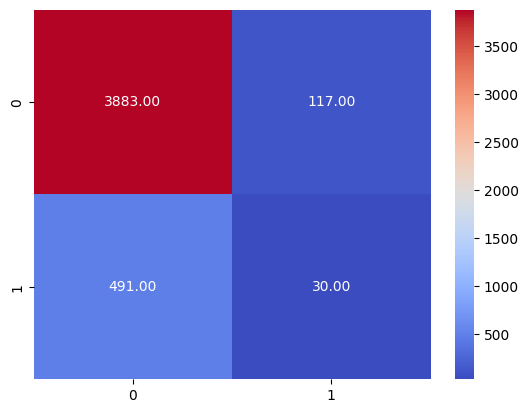

In [51]:
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="coolwarm")

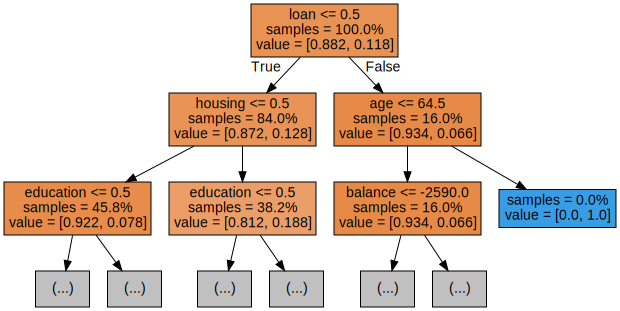

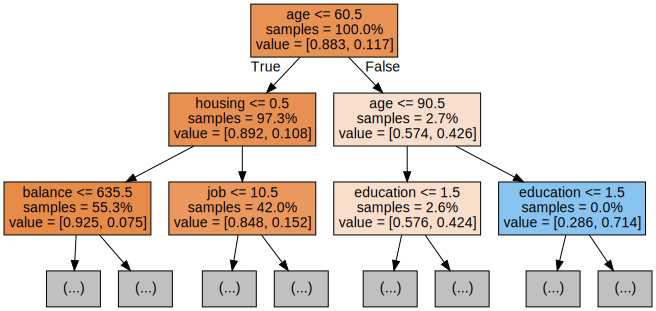

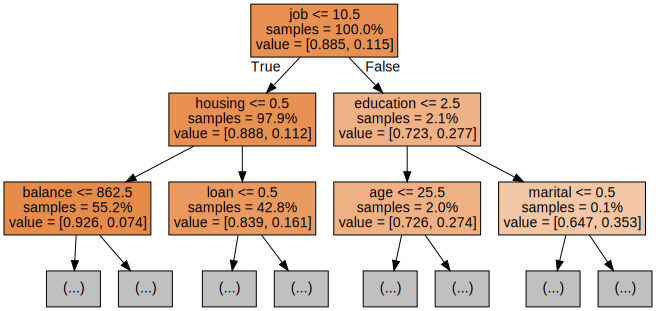

In [52]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

# **Hyperparameter Tuning**

In [54]:
param_dist = {'n_estimators': [50, 300, 500],
              'max_depth': [5, 20, None],
              }

rf = RandomForestClassifier(class_weight='balanced')

grid_search = GridSearchCV(estimator = rf,
                                 param_grid = param_dist,
                                 n_jobs=-1,
                                 verbose=1)

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 20, None],
                         'n_estimators': [50, 300, 500]},
             verbose=1)

In [55]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grid_search.best_params_)

Best hyperparameters: {'max_depth': None, 'n_estimators': 50}


In [56]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 86.55%


In [57]:
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)

[[3883  117]
 [ 491   30]]


In [58]:
report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      4000
           1       0.20      0.06      0.09       521

    accuracy                           0.87      4521
   macro avg       0.55      0.51      0.51      4521
weighted avg       0.81      0.87      0.83      4521



<Axes: >

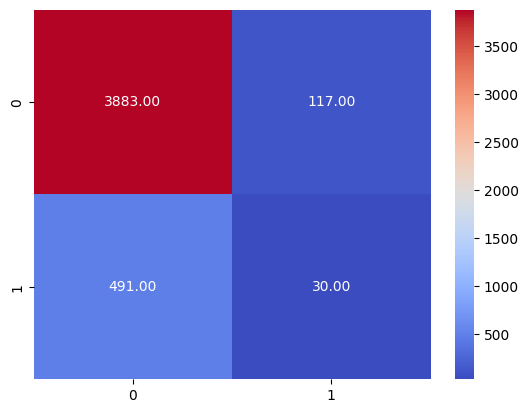

In [59]:
sns.heatmap(conf_mat, annot=True, fmt=".2f", cmap="coolwarm")

In [60]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {(accuracy * 100):.2f}%")

Accuracy: 86.55%


<Axes: >

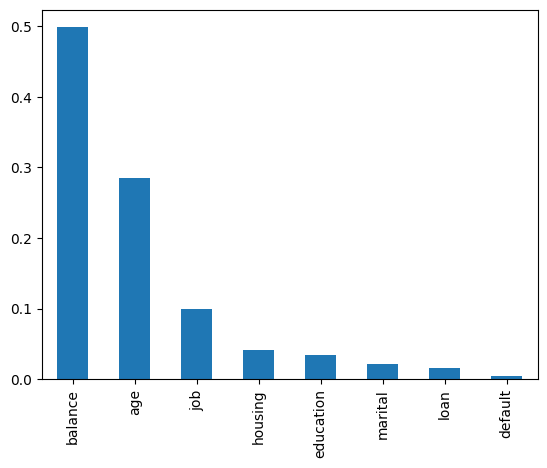

In [61]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()